# Advanced Regression: Predicting House Prices
[Competition Link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

## Best Score: 0.11897 (RMSE)
## Leaderboard: 236/4717

In [1]:
# ! pip install -U mljar-supervised

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Ingest Data

In [3]:
trainDf_raw = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
testDf_raw = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
trainDf = trainDf_raw.copy()
testDf = testDf_raw.copy()

# EDA

<ul>
<li><strong>SalePrice</strong> - the property's sale price in dollars. This is the target variable that you're trying to predict.</li>
<li><strong>MSSubClass</strong>: The building class</li>
<li><strong>MSZoning</strong>: The general zoning classification</li>
<li><strong>LotFrontage</strong>: Linear feet of street connected to property</li>
<li><strong>LotArea</strong>: Lot size in square feet</li>
<li><strong>Street</strong>: Type of road access</li>
<li><strong>Alley</strong>: Type of alley access</li>
<li><strong>LotShape</strong>: General shape of property</li>
<li><strong>LandContour</strong>: Flatness of the property</li>
<li><strong>Utilities</strong>: Type of utilities available</li>
<li><strong>LotConfig</strong>: Lot configuration</li>
<li><strong>LandSlope</strong>: Slope of property</li>
<li><strong>Neighborhood</strong>: Physical locations within Ames city limits</li>
<li><strong>Condition1</strong>: Proximity to main road or railroad</li>
<li><strong>Condition2</strong>: Proximity to main road or railroad (if a second is present)</li>
<li><strong>BldgType</strong>: Type of dwelling</li>
<li><strong>HouseStyle</strong>: Style of dwelling</li>
<li><strong>OverallQual</strong>: Overall material and finish quality</li>
<li><strong>OverallCond</strong>: Overall condition rating</li>
<li><strong>YearBuilt</strong>: Original construction date</li>
<li><strong>YearRemodAdd</strong>: Remodel date</li>
<li><strong>RoofStyle</strong>: Type of roof</li>
<li><strong>RoofMatl</strong>: Roof material</li>
<li><strong>Exterior1st</strong>: Exterior covering on house</li>
<li><strong>Exterior2nd</strong>: Exterior covering on house (if more than one material)</li>
<li><strong>MasVnrType</strong>: Masonry veneer type</li>
<li><strong>MasVnrArea</strong>: Masonry veneer area in square feet</li>
<li><strong>ExterQual</strong>: Exterior material quality</li>
<li><strong>ExterCond</strong>: Present condition of the material on the exterior</li>
<li><strong>Foundation</strong>: Type of foundation</li>
<li><strong>BsmtQual</strong>: Height of the basement</li>
<li><strong>BsmtCond</strong>: General condition of the basement</li>
<li><strong>BsmtExposure</strong>: Walkout or garden level basement walls</li>
<li><strong>BsmtFinType1</strong>: Quality of basement finished area</li>
<li><strong>BsmtFinSF1</strong>: Type 1 finished square feet</li>
<li><strong>BsmtFinType2</strong>: Quality of second finished area (if present)</li>
<li><strong>BsmtFinSF2</strong>: Type 2 finished square feet</li>
<li><strong>BsmtUnfSF</strong>: Unfinished square feet of basement area</li>
<li><strong>TotalBsmtSF</strong>: Total square feet of basement area</li>
<li><strong>Heating</strong>: Type of heating</li>
<li><strong>HeatingQC</strong>: Heating quality and condition</li>
<li><strong>CentralAir</strong>: Central air conditioning</li>
<li><strong>Electrical</strong>: Electrical system</li>
<li><strong>1stFlrSF</strong>: First Floor square feet</li>
<li><strong>2ndFlrSF</strong>: Second floor square feet</li>
<li><strong>LowQualFinSF</strong>: Low quality finished square feet (all floors)</li>
<li><strong>GrLivArea</strong>: Above grade (ground) living area square feet</li>
<li><strong>BsmtFullBath</strong>: Basement full bathrooms</li>
<li><strong>BsmtHalfBath</strong>: Basement half bathrooms</li>
<li><strong>FullBath</strong>: Full bathrooms above grade</li>
<li><strong>HalfBath</strong>: Half baths above grade</li>
<li><strong>Bedroom</strong>: Number of bedrooms above basement level</li>
<li><strong>Kitchen</strong>: Number of kitchens</li>
<li><strong>KitchenQual</strong>: Kitchen quality</li>
<li><strong>TotRmsAbvGrd</strong>: Total rooms above grade (does not include bathrooms)</li>
<li><strong>Functional</strong>: Home functionality rating</li>
<li><strong>Fireplaces</strong>: Number of fireplaces</li>
<li><strong>FireplaceQu</strong>: Fireplace quality</li>
<li><strong>GarageType</strong>: Garage location</li>
<li><strong>GarageYrBlt</strong>: Year garage was built</li>
<li><strong>GarageFinish</strong>: Interior finish of the garage</li>
<li><strong>GarageCars</strong>: Size of garage in car capacity</li>
<li><strong>GarageArea</strong>: Size of garage in square feet</li>
<li><strong>GarageQual</strong>: Garage quality</li>
<li><strong>GarageCond</strong>: Garage condition</li>
<li><strong>PavedDrive</strong>: Paved driveway</li>
<li><strong>WoodDeckSF</strong>: Wood deck area in square feet</li>
<li><strong>OpenPorchSF</strong>: Open porch area in square feet</li>
<li><strong>EnclosedPorch</strong>: Enclosed porch area in square feet</li>
<li><strong>3SsnPorch</strong>: Three season porch area in square feet</li>
<li><strong>ScreenPorch</strong>: Screen porch area in square feet</li>
<li><strong>PoolArea</strong>: Pool area in square feet</li>
<li><strong>PoolQC</strong>: Pool quality</li>
<li><strong>Fence</strong>: Fence quality</li>
<li><strong>MiscFeature</strong>: Miscellaneous feature not covered in other categories</li>
<li><strong>MiscVal</strong>: $Value of miscellaneous feature</li>
<li><strong>MoSold</strong>: Month Sold</li>
<li><strong>YrSold</strong>: Year Sold</li>
<li><strong>SaleType</strong>: Type of sale</li>
<li><strong>SaleCondition</strong>: Condition of sale</li>
</ul>

In [5]:
pd.set_option("max_columns", None)

In [6]:
trainDf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Target Distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


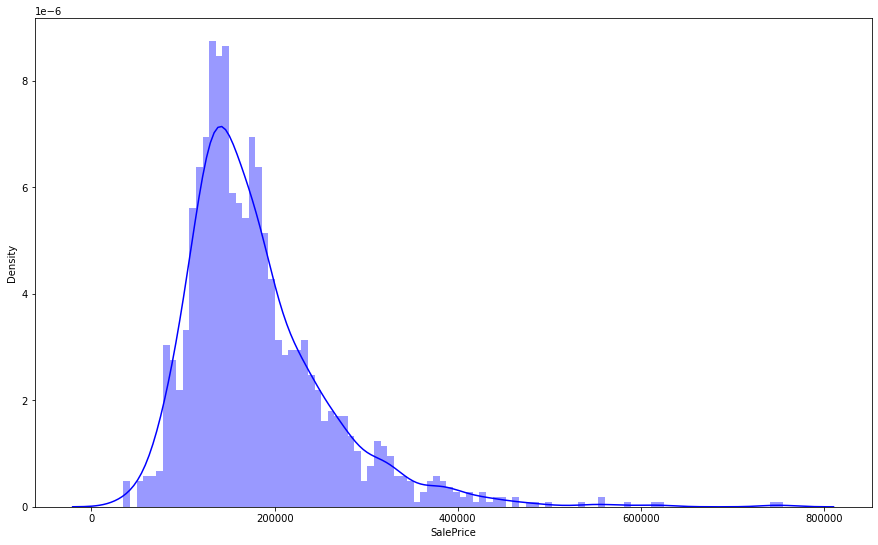

In [8]:
print(trainDf['SalePrice'].describe())
plt.figure(figsize=(15, 9))
sns.distplot(trainDf['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});

## Handling Missing Values

### Replace nan with "None" in object cols with nan

In [9]:
# Alley, FireplaceQu, PoolQC, Fence, MiscFeature
# Unique values
object_cols_with_nan = ["Alley", "FireplaceQu", "Fence", "MiscFeature", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for column in object_cols_with_nan:
    print(f"{column}: ", trainDf[column].unique())

Alley:  [nan 'Grvl' 'Pave']
FireplaceQu:  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Fence:  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature:  [nan 'Shed' 'Gar2' 'Othr' 'TenC']
MasVnrType:  ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
BsmtQual:  ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond:  ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure:  ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1:  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2:  ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
GarageType:  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish:  ['RFn' 'Unf' 'Fin' nan]
GarageQual:  ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond:  ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [10]:
def replace_with_none(df, columns):
    df[columns] = df[columns].fillna('None')
    return df

In [11]:
trainDf = replace_with_none(trainDf, object_cols_with_nan)

In [12]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Replace nan with "None" in num cols with nan

#### Replace "LotFrontage", "MasVnrArea", "GarageYrBlt" with median

In [13]:
num_cols_with_nan = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]
def replace_with_median(df, columns):
    df[columns] = df[columns].fillna(df[columns].median())
    return df

In [14]:
trainDf = replace_with_median(trainDf, num_cols_with_nan)

#### Replace 'Electrical' with mode

In [15]:
def replace_with_mode(df, columns):
    df[columns] = df[columns].fillna(df[columns].mode()[0])
    return df

In [16]:
trainDf = replace_with_mode(trainDf, 'Electrical')

In [17]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Drop PoolQC Column

In [18]:
def drop_poolqc_cols(df, column='PoolQC'):
    df = df.drop(column, axis = 1)
    return df

In [19]:
trainDf = drop_poolqc_cols(trainDf)

In [20]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Feature Engineering

**New Numerical features**

Age => YrSold - YearBuilt\
HasPool => PoolArea != 0\
HasBasement => BsmtQual = None\
HasGarage => GarageType = None\
Total Sqft TotalSF => TotalBsmtSF + 1stFlrSF + 2ndFlrSF\
IsRemodeled => YearBuilt != YearRemodAdd

**Categorical Encoding**

Ordinal: OverallQual, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, PoolQC, Fence, GarageFinish, PavedDrive

Onehot encoding: MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, Electrical, Functional, GarageType, SaleType, SaleCondition, Electrical

Target Encoding: Neighbourhood



CentralAir: Replace Yes with 1 and No with 0



In [21]:
# Number of object columns
trainDf.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

## Create new numerical features

In [22]:
def numerical_feature_eng(df):
    df['Age'] = df['YrSold'] - df['YearBuilt']
    df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF']
    df['HasPool'] = (df['PoolArea'] != 0).astype(int)
    df['HasAlley'] = (df['Alley'] != 'None').astype(int)
    df['HasFence'] = (df['Fence'] != 'None').astype(int)
    df['HasBasement'] = (df['BsmtQual'] != 'None').astype(int)
    df['HasGarage'] = (df['GarageType'] != 'None').astype(int)
    df['IsRemodeled'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)
    return df

In [23]:
trainDf = numerical_feature_eng(trainDf)

**Drop some columns with too many "None" or remove all columns with 'None' after onehot encoding**


## Ordinal Encoding

In [24]:
ordinal_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "Fence", "GarageFinish", "PavedDrive", "CentralAir"]
for column in ordinal_cols:
    print(f"{column}: ", trainDf[column].unique())

ExterQual:  ['Gd' 'TA' 'Ex' 'Fa']
ExterCond:  ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual:  ['Gd' 'TA' 'Ex' 'None' 'Fa']
BsmtCond:  ['TA' 'Gd' 'None' 'Fa' 'Po']
BsmtExposure:  ['No' 'Gd' 'Mn' 'Av' 'None']
BsmtFinType1:  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
BsmtFinType2:  ['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']
HeatingQC:  ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual:  ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu:  ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageQual:  ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
GarageCond:  ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']
Fence:  ['None' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
GarageFinish:  ['RFn' 'Unf' 'Fin' 'None']
PavedDrive:  ['Y' 'N' 'P']
CentralAir:  ['Y' 'N']


In [25]:
# Define mappings for ordinal encoding
# ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual, FireplaceQu, GarageCond
quality_map = {
    "Ex": 5,  # Excellent
    "Gd": 4,  # Good
    "TA": 3,  # Typical/Average
    "Fa": 2,  # Fair
    "Po": 1,  # Poor
    "None": 0 # Not available / no feature
}

# BsmtFinType1, BsmtFinType2
BsmtFinType_map = {
    "GLQ": 6,  # Good Living Quarters
    "ALQ": 5,  # Average Living Quarters
    "BLQ": 4,  # Below Average Living Quarters
    "Rec": 3,  # Average Rec Room
    "LwQ": 2,  # Low Quality
    "Unf": 1,  # Unfinished
    "None": 0  # No basement
}

# BsmtExposure
BsmtExposure_map = {
    "Gd": 4,    # Good Exposure
    "Av": 3,	# Average Exposure
    "Mn": 2,	# Mimimum Exposure
    "No": 1,	# No Exposure
    "None": 0	# No Basement
}

# Fence
Fence_map = {		
    "GdPrv": 4,	# Good Privacy
    "MnPrv": 3,	# Minimum Privacy
    "GdWo": 2,	# Good Wood
    "MnWw": 1,	# Minimum Wood/Wire
    "None": 0	# No Fence
}

# PavedDrive
PavedDrive_map = {
    "Y": 2,	# Paved 
    "P": 1,	# Partial Pavement
    "N": 0	# Dirt/Gravel
}

# GarageFinish
GarageFinish_map = {
    "Fin": 3,	# Finished
    "RFn": 2,	# Rough Finished	
    "Unf": 1,	# Unfinished
    "None": 0	# No Garage
}

# CentralAir
CentralAir_map = {
    "Y": 1,
    "N": 0
}

In [26]:
quality_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageCond", "GarageQual"]

In [27]:
def mapping(df, quality_cols):

    def map_quality(df, cols=quality_cols):
        for col in cols:
            df[col] = df[col].map(quality_map)
        return df
    def map_BsmtFinType(df, cols=['BsmtFinType1', 'BsmtFinType2']):
        for col in cols:
            df[col] = df[col].map(BsmtFinType_map)
        return df
    def map_BsmtExposure(df, cols=['BsmtExposure']):
        for col in cols:
            df[col] = df[col].map(BsmtExposure_map)
        return df
    def map_Fence(df, cols=['Fence']):
        for col in cols:
            df[col] = df[col].map(Fence_map)
        return df
    def map_PavedDrive(df, cols=['PavedDrive']):
        for col in cols:
            df[col] = df[col].map(PavedDrive_map)
        return df
    def map_GarageFinish(df, cols=['GarageFinish']):
        for col in cols:
            df[col] = df[col].map(GarageFinish_map)
        return df
    def map_CentralAir(df, cols=['CentralAir']):
        for col in cols:
            df[col] = df[col].map(CentralAir_map)
        return df
            
    df = map_quality(df)
    df = map_BsmtFinType(df)
    df = map_BsmtExposure(df)
    df = map_Fence(df)
    df = map_PavedDrive(df)
    df = map_GarageFinish(df)
    df = map_CentralAir(df)
    return df


In [28]:
trainDf = mapping(trainDf, quality_cols=quality_cols)

In [29]:
trainDf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,TotalSF,HasPool,HasAlley,HasFence,HasBasement,HasGarage,IsRemodeled
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,None,0,2,2008,WD,Normal,208500,5,1710,0,0,0,1,1,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,None,0,5,2007,WD,Normal,181500,31,1262,0,0,0,1,1,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,None,0,9,2008,WD,Normal,223500,7,1786,0,0,0,1,1,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,1,3,642,3,3,2,0,35,272,0,0,0,0,None,0,2,2006,WD,Abnorml,140000,91,1717,0,0,0,1,1,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,2,3,836,3,3,2,192,84,0,0,0,0,0,None,0,12,2008,WD,Normal,250000,8,2198,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0,1,0,953,953,GasA,5,1,SBrkr,953,694,0,1647,0,0,2,1,3,1,3,7,Typ,1,3,Attchd,1999.0,2,2,460,3,3,2,0,40,0,0,0,0,0,None,0,8,2007,WD,Normal,175000,8,1647,0,0,0,1,1,1
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,3,3,CBlock,4,3,1,5,790,3,163,589,1542,GasA,3,1,SBrkr,2073,0,0,2073,1,0,2,0,3,1,3,7,Min1,2,3,Attchd,1978.0,1,2,500,3,3,2,349,0,0,0,0,0,3,None,0,2,2010,WD,Normal,210000,32,2073,0,0,1,1,1,1
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,5,4,Stone,3,4,1,6,275,1,0,877,1152,GasA,5,1,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,4,9,Typ,2,4,Attchd,1941.0,2,1,252,3,3,2,0,60,0,0,0,0,4,Shed,2500,5,2010,WD,Normal,266500,69,2340,0,0,1,1,1,1
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,H

In [30]:
ordinal_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "Fence", "GarageFinish", "PavedDrive"]
for column in ordinal_cols:
    print(f"{column}: ", trainDf[column].unique())

ExterQual:  [4 3 5 2]
ExterCond:  [3 4 2 1 5]
BsmtQual:  [4 3 5 0 2]
BsmtCond:  [3 4 0 2 1]
BsmtExposure:  [1 4 2 3 0]
BsmtFinType1:  [6 5 1 3 4 0 2]
BsmtFinType2:  [1 4 0 5 3 2 6]
HeatingQC:  [5 4 3 2 1]
KitchenQual:  [4 3 5 2]
FireplaceQu:  [0 3 4 2 5 1]
GarageQual:  [3 2 4 0 5 1]
GarageCond:  [3 2 0 4 1 5]
Fence:  [0 3 2 4 1]
GarageFinish:  [2 1 3 0]
PavedDrive:  [2 0 1]


## OneHot Encoding

In [31]:
one_hot_cols = ["MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", "Electrical", "Functional", "GarageType", "SaleType", "SaleCondition"]
for column in one_hot_cols:
    print(f"{column}: ", trainDf[column].unique())

MSZoning:  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street:  ['Pave' 'Grvl']
Alley:  ['None' 'Grvl' 'Pave']
LotShape:  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour:  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities:  ['AllPub' 'NoSeWa']
LotConfig:  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope:  ['Gtl' 'Mod' 'Sev']
Condition1:  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2:  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType:  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle:  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle:  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl:  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st:  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd:  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 

In [32]:
def one_hot_encode(df, columns):
    return pd.get_dummies(df, columns=columns, drop_first=False)

In [33]:
trainDf = one_hot_encode(trainDf, one_hot_cols)

In [34]:
trainDf.head()

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,Age,TotalSF,HasPool,HasAlley,HasFence,HasBasement,HasGarage,IsRemodeled,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,CollgCr,7,5,2003,2003,196.0,4,3,4,3,1,6,706,1,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,None,0,2,2008,208500,5,1710,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,Veenker,6,8,1976,1976,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,None,0,5,2007,181500,31,1262,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,

In [35]:
trainDf.select_dtypes(include=["object"]).columns

Index(['Neighborhood', 'MiscFeature'], dtype='object')

## **`Neighborhood`** column Target Encoding

In [36]:
trainDf['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [37]:
import category_encoders as ce
from sklearn.model_selection import KFold

In [38]:
def encode_neighborhood_train(df):
    encoder = ce.TargetEncoder(cols=['Neighborhood'])
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    df['Neighborhood_encoded'] = 0
    for train_idx, val_idx in kf.split(df):
        encoder.fit(df.iloc[train_idx], df.iloc[train_idx]['SalePrice'])
        df.loc[val_idx, 'Neighborhood_encoded'] = encoder.transform(df.iloc[val_idx])['Neighborhood']
    neighborhood_map = neighborhood_map = df.groupby('Neighborhood')['Neighborhood_encoded'].mean().to_dict()

    df = df.drop('Neighborhood', axis=1)
    return df, neighborhood_map

def encode_neighborhood_test(df, neighborhood_map):
    df['Neighborhood_encoded'] = df['Neighborhood'].map(neighborhood_map)
    df = df.drop('Neighborhood', axis=1)
    return df


In [39]:
trainDf, neighborhood_map = encode_neighborhood_train(trainDf)

In [40]:
trainDf['Neighborhood_encoded'].unique()

array([197484.35294118, 226030.47208006, 216567.28205128, 346306.3030303 ,
       159636.10810811, 226809.89230769, 188041.46551724, 125893.73626374,
       125387.79069767, 137768.91071429, 314260.23333333, 195443.87179487,
       144715.53551913, 122640.        , 146545.55688623, 137716.05882353,
       187935.84      , 319506.44615385,  97974.375     , 200138.368     ,
       101899.81622879, 315093.41935484, 106623.07692412, 201112.00869565,
       144572.88020833, 132023.17647059, 237627.40740712, 187842.84444444,
       147408.20441989, 153435.71428571, 126891.41052632, 136867.81034483,
       189150.86153846,  97192.41379316, 146143.74576271, 226403.79710145,
       302605.69932114,  99733.7931035 , 132886.9010989 , 312157.09836066,
       126233.24096386, 211969.6363404 , 157288.68292683, 191312.6       ,
        99369.7343321 , 129095.16304348, 156968.4       , 336303.47058823,
       192305.61016949, 229639.98571429, 100002.5       , 213083.97674419,
       194735.65671642, 1

In [41]:
trainDf['Neighborhood_encoded']

0       197484.352941
1       226030.472080
2       197484.352941
3       216567.282051
4       346306.303030
            ...      
1455    191312.600000
1456    190312.604167
1457    211746.435897
1458    146545.556886
1459    129392.758621
Name: Neighborhood_encoded, Length: 1460, dtype: float64

In [42]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 217 entries, Id to Neighborhood_encoded
dtypes: float64(4), int64(59), object(1), uint8(153)
memory usage: 948.3+ KB


In [43]:
trainDf.select_dtypes(include=['object']).columns

Index(['MiscFeature'], dtype='object')

In [44]:
trainDf['MiscFeature'].unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

## Drop `MiscFeature` column

In [45]:
def drop_MiscFeature(df):
    df["MiscFeature_mod"] = df["MiscFeature"].replace("None", np.nan)
    encoded = pd.get_dummies(df["MiscFeature_mod"], prefix="MiscFeature")
    df = pd.concat([df.drop(["MiscFeature", "MiscFeature_mod"], axis=1), encoded], axis=1)
    return df

In [46]:
trainDf = drop_MiscFeature(trainDf)

In [47]:
def drop_id(df):
    df = df.drop(["Id"], axis=1)
    return df

In [48]:
trainDf = drop_id(trainDf)

In [49]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 219 entries, MSSubClass to MiscFeature_TenC
dtypes: float64(4), int64(58), uint8(157)
memory usage: 931.2 KB


# Create Pipeline for all Feature Eng. Steps

In [50]:
def transform(df, object_cols_with_nan, num_cols_with_nan, quality_cols, one_hot_cols, neighborhood_map):
    df = replace_with_none(df, object_cols_with_nan)
    df = replace_with_median(df, num_cols_with_nan)
    df = replace_with_mode(df, 'Electrical')
    df = drop_poolqc_cols(df)
    df = numerical_feature_eng(df)
    df = mapping(df, quality_cols)
    df = one_hot_encode(df, one_hot_cols)
    df = encode_neighborhood_test(df, neighborhood_map)
    df = drop_MiscFeature(df)
    df = drop_id(df)
    df = df.fillna(df.median(numeric_only=True))
    return df
    

# Apply Transformations on Test Set

In [51]:
testDf = transform(testDf_raw, object_cols_with_nan=object_cols_with_nan, num_cols_with_nan=num_cols_with_nan, quality_cols = quality_cols, one_hot_cols=one_hot_cols, neighborhood_map=neighborhood_map)

In [52]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 202 entries, MSSubClass to MiscFeature_Shed
dtypes: float64(13), int64(48), uint8(141)
memory usage: 896.3 KB


In [53]:
testDf.columns[150:]

Index(['Exterior2nd_Wd Shng', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_Wall', 'Electrical_FuseA', 'Electrical_FuseF',
       'Electrical_FuseP', 'Electrical_SBrkr', 'Functional_Maj1',
       'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Sev', 'Functional_Typ',
       'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       '

In [54]:
trainDf.columns[150:]

Index(['Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc',
       'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood',
       'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkCmn',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav',
       'Heating_OthW', 'Heating_Wall', 'Electrical_FuseA', 'Electrical_FuseF',
       'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr',
       'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1',
       'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ',
       'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basme

In [55]:
result = [item for item in trainDf.columns.tolist() if item not in testDf.columns.tolist()]
print("Elements in trainDf but not in testDf:", result)


Elements in trainDf but not in testDf: ['SalePrice', 'Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'MiscFeature_TenC']


In [56]:
testDf_raw['RoofMatl'].unique()

array(['CompShg', 'Tar&Grv', 'WdShake', 'WdShngl'], dtype=object)

In [57]:
trainDf_raw['RoofMatl'].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

# Modelling

## RandomForestRegressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

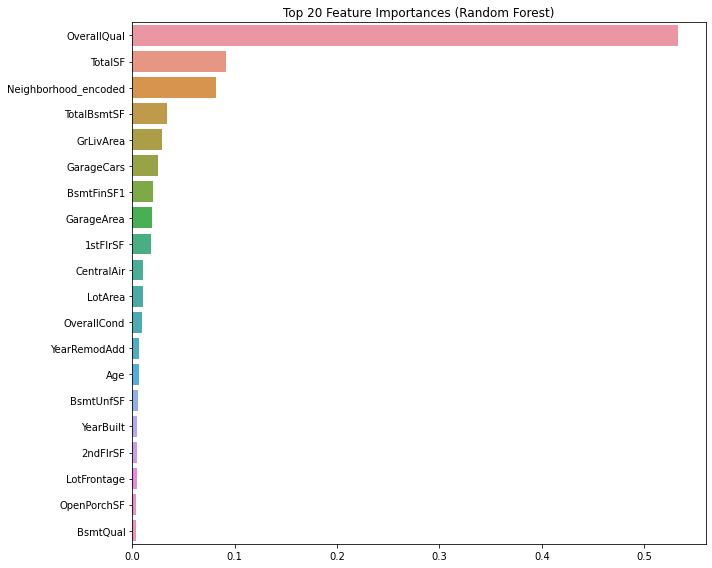

In [59]:
X_train = trainDf.drop("SalePrice", axis=1)
y_train = np.log1p(trainDf["SalePrice"])

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


# Get importances
importances = rf.feature_importances_
features = X_train.columns
indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=importances[indices][:20], y=features[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# # When predicting on test set, reverse it
# preds = model.predict(X_test)
# final_preds = np.expm1(preds)  # Inverse of log1p


In [60]:
y_train.max()

13.534474352733596

In [61]:
X_train.columns.tolist()[21]

'1stFlrSF'

In [62]:
trainDf['CentralAir']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: CentralAir, Length: 1460, dtype: int64

In [63]:
testDf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,Age,TotalSF,HasPool,HasAlley,HasFence,HasBasement,HasGarage,IsRemodeled,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_encoded,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed
0,20,80.0,11622,5,6,1961,1961,0.0,3,3,3,3,1,3,468.0,2,144.0,270.0,882.0,3,1,896,0,0,896,0.0,0.0,1,0,2,1,3.0,5,0,0,1961.0,1,1.0,730.0,3,3,2,140,0,0,0,120,0,3,0,6,2010,49,896,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,145997.602796,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,3,3,3,3,1,5,923.0,1,0.0,406.0,1329.0,3,1,1329,0,0,1329,0.0,0.0,1,1,3,1,4.0,6,0,0,1958.0,1,1.0,312.0,3,3,2,393,36,0,0,0,0,0,12500,6,2010,52,1329,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,145997.602796,1,0,0
2,60,74.0,13830

#### Add Missing Columns to Test Set

In [64]:
X_test = testDf.copy()
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [65]:
result = [item for item in X_train.columns.tolist() if item not in X_test.columns.tolist()]
print("Elements in X_train but not in X_test:", result)

Elements in X_train but not in X_test: []


In [66]:
importances[indices][:20]

array([0.53322375, 0.09156811, 0.0815171 , 0.03339992, 0.02926161,
       0.02546395, 0.02054254, 0.01924883, 0.01852668, 0.0107388 ,
       0.00998869, 0.00951359, 0.00679074, 0.0061988 , 0.005096  ,
       0.00494015, 0.00461523, 0.00437745, 0.00357322, 0.00355946])

In [67]:
features[indices][:20]

Index(['OverallQual', 'TotalSF', 'Neighborhood_encoded', 'TotalBsmtSF',
       'GrLivArea', 'GarageCars', 'BsmtFinSF1', 'GarageArea', '1stFlrSF',
       'CentralAir', 'LotArea', 'OverallCond', 'YearRemodAdd', 'Age',
       'BsmtUnfSF', 'YearBuilt', '2ndFlrSF', 'LotFrontage', 'OpenPorchSF',
       'BsmtQual'],
      dtype='object')

In [68]:
new_cols = features[indices][:20].tolist()

In [69]:
X_train_RF = X_train[new_cols]
X_test_RF = X_test[new_cols]

In [70]:
X_test_RF[X_test_RF.isnull().any(axis=1)]

,OverallQual,TotalSF,Neighborhood_encoded,TotalBsmtSF,GrLivArea,GarageCars,BsmtFinSF1,GarageArea,1stFlrSF,CentralAir,LotArea,OverallCond,YearRemodAdd,Age,BsmtUnfSF,YearBuilt,2ndFlrSF,LotFrontage,OpenPorchSF,BsmtQual


In [71]:
X_test.iloc[[660, 1116]]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,Age,TotalSF,HasPool,HasAlley,HasFence,HasBasement,HasGarage,IsRemodeled,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_encoded,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
660,20,99.0,5940,4,7,1946,1950,0.0,3,3,0,0,0,0,350.5,0,0.0,460.0,988.0,3,1,896,0,0,896,0.0,0.0,1,0,2,1,3.0,4,0,0,1946.0,1,1.0,280.0,3,3,2,0,0,0,0,0,0,3,0,4,2008,62,896,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,124883.688529,0,0,0,0
1116,70,50.0,9060,5,6,1923,1999,0.0,3,3,4,3,1,5,548.0,1,0.0,311.0,859.0,5,1,942,886,0,1828,0.0,0.0,2,0,3,1,4.0,6,0,0,1979.0,0,2.0,480.0,0,0,2,174,0,212,0,0,0,3,0,3,2007,84,1828,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,

In [72]:
X_train_RF = X_train_RF.values.astype(float)
X_test_RF = X_test_RF.values.astype(float)

In [73]:
# X_test_RF.isnull().sum().sort_values(ascending=False).head()

In [74]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_RF, y_train)

RandomForestRegressor(random_state=42)

In [75]:
y_pred_log = rf.predict(X_test_RF)

In [76]:
# Reverse log of output
y_pred = np.expm1(y_pred_log)
y_pred

array([125638.84824614, 156310.87555539, 193661.57160817, ...,
       162525.67929376, 111651.10623697, 228006.62233949])

In [77]:
pd.DataFrame({
    'Id': testDf_raw['Id'].values,
    'SalePrice': y_pred
})

,Id,SalePrice
0,1461,125638.848246
1,1462,156310.875555
2,1463,193661.571608
3,1464,183820.218391
4,1465,199767.617804
...,...,...
1454,2915,82051.305776
1455,2916,84998.088327
1456,2917,162525.679294
1457,2918,111651.106237


In [78]:
pd.DataFrame({
    'Id': testDf_raw['Id'].values,
    'SalePrice': y_pred
}).to_csv('submission.csv', index=False)

**Score: 0.14567**\
**Model: RF**

## XGBoost with all columns

In [79]:
from xgboost import XGBRegressor

In [80]:
xgbReg = XGBRegressor()
xgbReg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [81]:
y_pred_xgb_log = xgbReg.predict(X_test)

In [82]:
y_pred_xgb = np.expm1(y_pred_xgb_log)
y_pred_xgb

array([117755.52, 145766.14, 190229.47, ..., 158955.38, 123673.52,
       211334.83], dtype=float32)

In [83]:
pd.DataFrame({
    'Id': testDf_raw['Id'].values,
    'SalePrice': y_pred_xgb
}).to_csv('submission.csv', index=False)

**Score: 0.14377**\
**Model: XGB**\
**Version 1**

## XGBoost with feature importance by gain

In [84]:
import xgboost as xgb

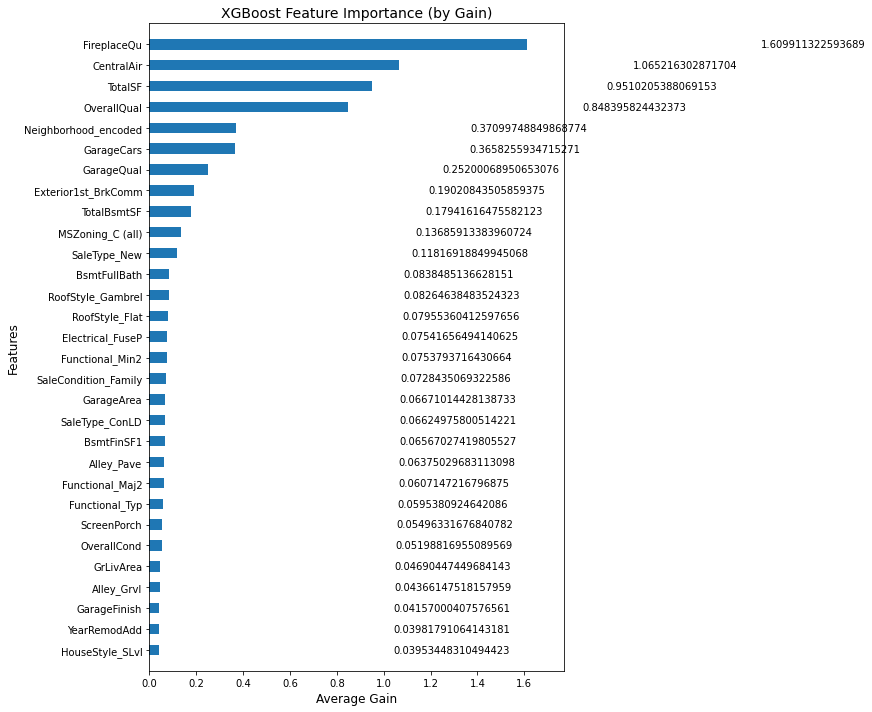

In [85]:
fig, ax = plt.subplots(figsize=(15, 10))

xgb.plot_importance(xgbReg, 
                    ax=ax,
                    importance_type='gain', 
                    max_num_features=30, 
                    height=0.5,
                    grid=False,
                    show_values=True)
ax.set_title("XGBoost Feature Importance (by Gain)", fontsize=14)
ax.set_xlabel("Average Gain", fontsize=12)
ax.set_ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

In [86]:
importance_dict = xgbReg.get_booster().get_score(importance_type='gain')

In [87]:
importance_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Gain'])
importance_df = importance_df.sort_values(by='Gain', ascending=False).reset_index(drop=True)

In [88]:
importance_df

,Feature,Gain
0,FireplaceQu,1.609911
1,CentralAir,1.065216
2,TotalSF,0.951021
3,OverallQual,0.848396
4,Neighborhood_encoded,0.370997
...,...,...
147,Electrical_SBrkr,0.000286
148,GarageType_Basment,0.000273
149,MiscFeature_Othr,0.000232
150,Exterior2nd_VinylSd,0.000222


In [89]:
importance_features = importance_df['Feature'][:5].values.tolist()

In [90]:
X_train_xgb = X_train[importance_features]
X_test_xgb = X_test[importance_features]

In [91]:
xgbReg.fit(X_train_xgb, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [92]:
y_pred_xgb_imp_log = xgbReg.predict(X_test_xgb)

In [93]:
y_pred_xgb_imp = np.expm1(y_pred_xgb_imp_log)
y_pred_xgb_imp

array([133187.73 , 162013.39 , 160863.78 , ..., 150328.05 , 119332.484,
       218620.53 ], dtype=float32)

In [94]:
pd.DataFrame({
    'Id': testDf_raw['Id'].values,
    'SalePrice': y_pred_xgb_imp
}).to_csv('submission.csv', index=False)

**Score: 0.16303**

## AutoML

In [95]:
pip show mljar-supervised

Name: mljar-supervised
Version: 1.0.2
Summary: Automated Machine Learning for Humans
Home-page: https://github.com/mljar/mljar-supervised
Author: MLJAR, Sp. z o.o.
Author-email: contact@mljar.com
License: MIT
Location: /opt/conda/lib/python3.7/site-packages
Requires: catboost, category-encoders, dtreeviz, ipython, joblib, lightgbm, markdown, matplotlib, numpy, optuna, pandas, scikit-learn, scikit-plot, scipy, seaborn, shap, tabulate, typing-extensions, wordcloud, xgboost
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [96]:
from supervised.automl import AutoML

In [97]:
automl = AutoML(mode="Compete", total_time_limit=4800)
automl.fit(X_train, y_train)
y_pred_automl_log = automl.predict(X_test)

AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree rmse 0.239356 trained in 0.65 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle
* Step simple_algorithms will try to check up to 4 models
1_DecisionTree rmse 0.220909 trained in 3.1 seconds
2_DecisionTree rmse 0.204452 trained in 3.04 seconds
3_DecisionTree rmse 0.204191 trained in 3.11 seconds
4_Linear r

In [98]:
y_pred_automl_log

array([11.72324818, 11.98707777, 12.12167826, ..., 12.0079075 ,
       11.66949081, 12.26446189])

In [99]:
y_pred_automl = np.expm1(y_pred_automl_log)
y_pred_automl

array([123406.62474263, 160664.16702716, 183812.74431542, ...,
       164045.87602565, 116947.7179003 , 212024.5123716 ])

In [100]:
pd.DataFrame({
    'Id': testDf_raw['Id'].values,
    'SalePrice': y_pred_automl
}).to_csv('submission.csv', index=False)

**AutoML Score: 0.11897**

Blending AutoML preds with xgb

In [103]:
blending_preds = 0.9 * y_pred_automl + 0.1 * y_pred_xgb

In [104]:
pd.DataFrame({
    'Id': testDf_raw['Id'].values,
    'SalePrice': blending_preds
}).to_csv('submission.csv', index=False)